In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import trange

In [2]:
PERM_PATH = Path("/Volumes/Passport/fmriprep/derivatives/RSA_stats/pieman/perm_test_neural_shift/parcel99_subject_s1_perms.npy")
OBS_PATH  = Path("/Volumes/Passport/fmriprep/derivatives/RSA_stats/pieman/perm_test_neural_shift/parcel99_observed_s1.npy")

In [3]:
perm_matrix = np.load(PERM_PATH)          # shape (n_perm, 75)
obs_s1      = np.load(OBS_PATH)           # shape (75,)

n_perm, n_subjects = perm_matrix.shape
assert n_subjects == obs_s1.size == 75

results = []  # (n, power) rows

rng = np.random.default_rng(42)           # reproducible

for n in range(20, n_subjects + 1):
    successes = 0
    for _ in range(100):
        subset = rng.choice(n_subjects, size=n, replace=False)
        
        obs_mean   = obs_s1[subset].mean()
        null_means = perm_matrix[:, subset].mean(axis=1)
        
        p_val = ( (null_means >= obs_mean).sum() + 1 ) / (n_perm + 1)
        if p_val < 0.05:
            successes += 1
    
    power = successes / 100
    results.append((n, power))
    print(f"n={n:2d} → power={power:.2%}")

results_df = pd.DataFrame(results, columns=['n', 'power'])

n=20 → power=36.00%
n=21 → power=33.00%
n=22 → power=38.00%
n=23 → power=37.00%
n=24 → power=46.00%
n=25 → power=40.00%
n=26 → power=40.00%
n=27 → power=50.00%
n=28 → power=47.00%
n=29 → power=39.00%
n=30 → power=41.00%
n=31 → power=48.00%
n=32 → power=49.00%
n=33 → power=59.00%
n=34 → power=54.00%
n=35 → power=50.00%
n=36 → power=50.00%
n=37 → power=50.00%
n=38 → power=49.00%
n=39 → power=53.00%
n=40 → power=53.00%
n=41 → power=57.00%
n=42 → power=63.00%
n=43 → power=54.00%
n=44 → power=60.00%
n=45 → power=65.00%
n=46 → power=68.00%
n=47 → power=65.00%
n=48 → power=60.00%
n=49 → power=79.00%
n=50 → power=69.00%
n=51 → power=58.00%
n=52 → power=67.00%
n=53 → power=77.00%
n=54 → power=72.00%
n=55 → power=73.00%
n=56 → power=71.00%
n=57 → power=73.00%
n=58 → power=70.00%
n=59 → power=80.00%
n=60 → power=78.00%
n=61 → power=70.00%
n=62 → power=82.00%
n=63 → power=83.00%
n=64 → power=80.00%
n=65 → power=79.00%
n=66 → power=78.00%
n=67 → power=85.00%
n=68 → power=89.00%
n=69 → power=94.00%


In [4]:
# Where do we hit 80/85/90 %?
for thresh in (0.80, 0.85, 0.90):
    hit = results_df.loc[results_df.power >= thresh, 'n'].min()
    print(f"Power ≥{int(thresh*100)}% first achieved at n = {hit}")

Power ≥80% first achieved at n = 59
Power ≥85% first achieved at n = 67
Power ≥90% first achieved at n = 69


[]


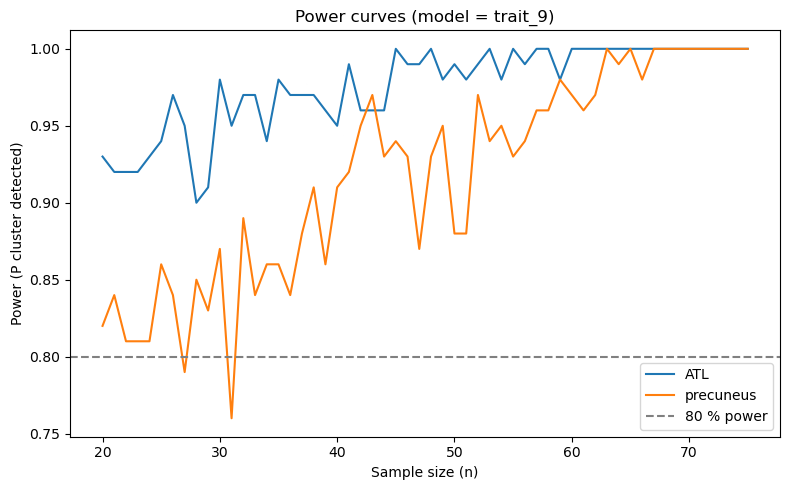


──── Power summary ────
ATL       : ≥80 % power at n = 20
precuneus : ≥80 % power at n = 20
